In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set up seaborn for better graphs
sns.set(style="whitegrid")


In [2]:
# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 1000
square_footage = np.random.randint(500, 5000, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
bathrooms = np.random.randint(1, 5, n_samples)

# Create a price based on a formula with some noise
price = (square_footage * 300) + (bedrooms * 50000) + (bathrooms * 30000) + np.random.randint(-50000, 50000, n_samples)

# Create a DataFrame
df = pd.DataFrame({
    'SquareFootage': square_footage,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Price': price
})

# Format the Price column as dollars in the DataFrame
df['Price'] = df['Price'].apply(lambda x: f'${x:,.0f}')

# Display the first 50 rows of the dataset
df.head(50)


,SquareFootage,Bedrooms,Bathrooms,Price
0,1360,2,4,"$624,738"
1,4272,3,4,"$1,573,278"
2,3592,1,4,"$1,209,709"
3,966,1,4,"$431,810"
4,4926,2,4,"$1,656,587"
5,3944,5,1,"$1,421,672"
6,3671,1,3,"$1,214,683"
7,3419,1,2,"$1,147,409"
8,630,3,4,"$478,785"
9,2185,4,2,"$900,018"


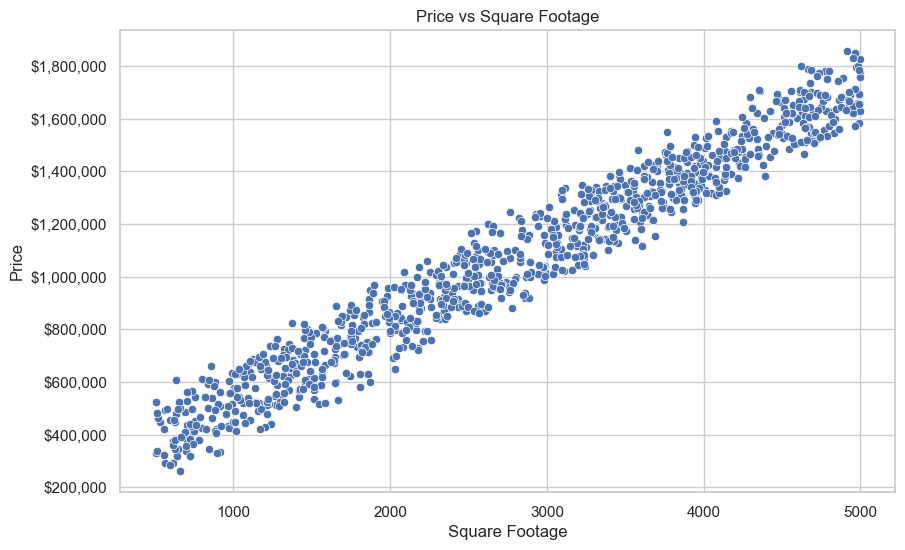

In [3]:
# Scatter plot of Price vs Square Footage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SquareFootage', y=df['Price'].str.replace('$', '').str.replace(',', '').astype(float), data=df)

# Format the y-axis with dollar sign, commas, and zero decimal places
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.title('Price vs Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()


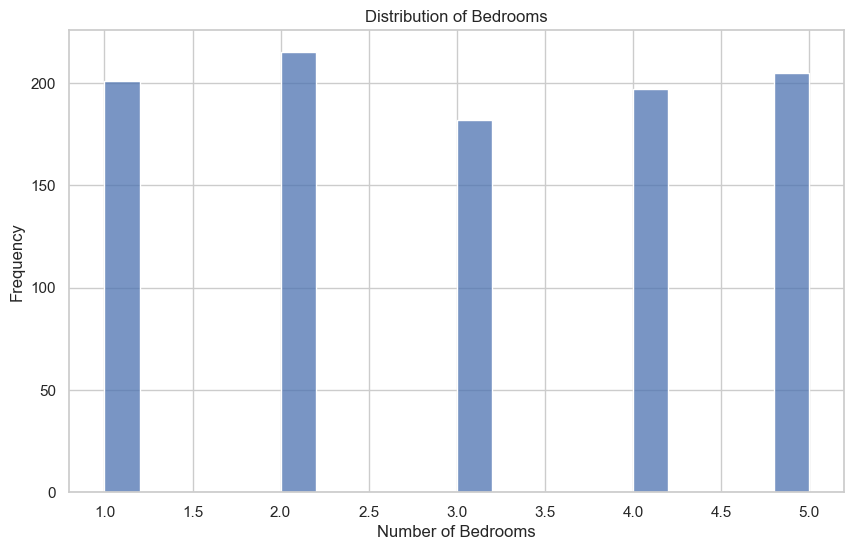

In [4]:
# Histogram of the number of bedrooms
plt.figure(figsize=(10, 6))
sns.histplot(df['Bedrooms'], bins=20, kde=False)

# Format the y-axis with commas and zero decimal places
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()


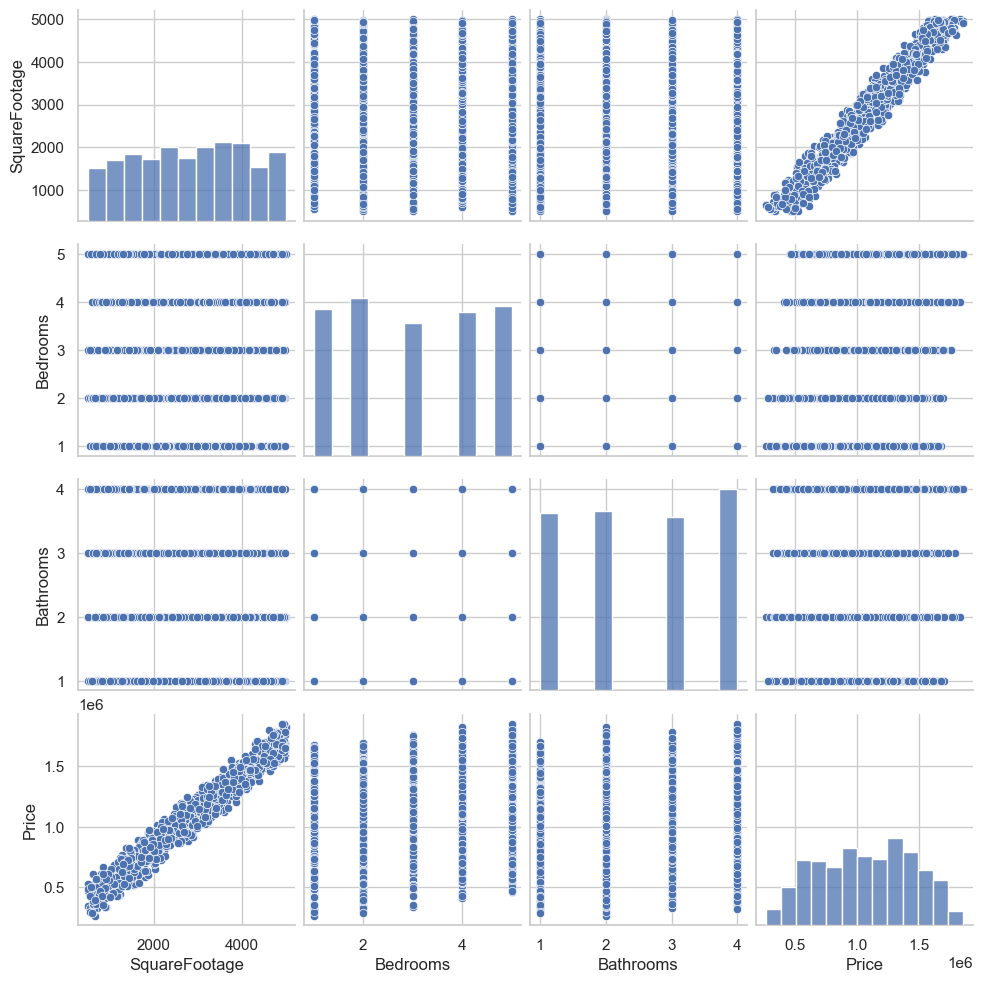

In [5]:
# Convert 'Price' column back to numeric for plotting
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

# Pairplot of all features
sns.pairplot(df)
plt.show()


In [6]:
# Features (X) and Target (y)
X = df[['SquareFootage', 'Bedrooms', 'Bathrooms']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [8]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


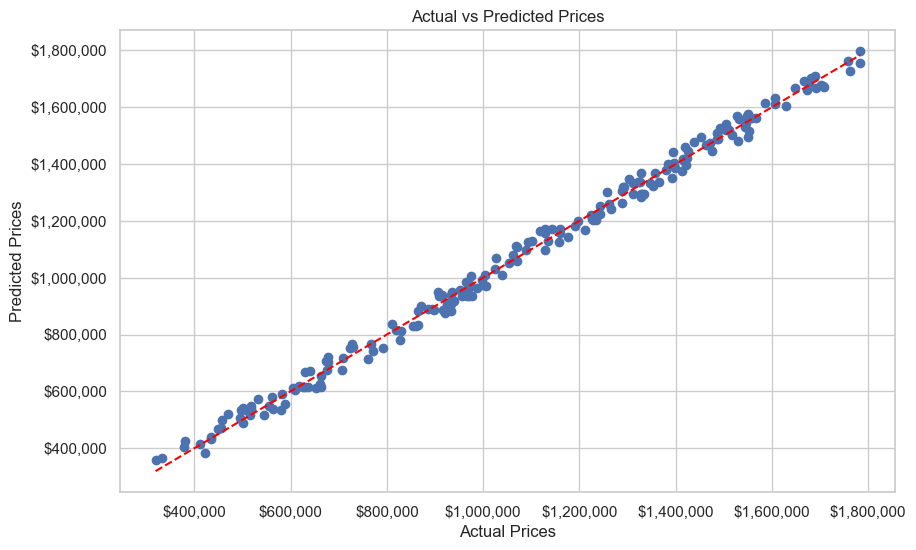

In [9]:
# Scatter plot of Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Format the axes with dollar sign and commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [10]:
# Function to predict house price based on input features
def predict_price(square_footage, bedrooms, bathrooms):
    prediction = model.predict([[square_footage, bedrooms, bathrooms]])
    return prediction[0]


In [11]:
# Example Prediction
example_square_footage = 2500
example_bedrooms = 4
example_bathrooms = 3

predicted_price = predict_price(example_square_footage, example_bedrooms, example_bathrooms)
print(f"The predicted price for a house with {example_square_footage} sqft, {example_bedrooms} bedrooms, and {example_bathrooms} bathrooms is: ${predicted_price:,.0f}")


The predicted price for a house with 2500 sqft, 4 bedrooms, and 3 bathrooms is: $1,038,972


C:\Users\shubh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Get user input
square_footage = float(input("Enter the square footage of the house: "))
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))

# Print the user inputs
print(f"\nYou entered the following details:")
print(f"Square Footage: {square_footage} sq ft")
print(f"Number of Bedrooms: {bedrooms}")
print(f"Number of Bathrooms: {bathrooms}")

# Predict the price
predicted_price = predict_price(square_footage, bedrooms, bathrooms)

# Display the predicted price
print(f"\nThe predicted price of the house is: ${predicted_price:,.0f}")


In [13]:
import pickle

# Save the trained model to a file
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved to house_price_model.pkl")


Model saved to house_price_model.pkl


In [14]:
import pickle

# Load the model from the file
with open('house_price_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print("Model loaded from house_price_model.pkl")

# Test the loaded model with an example prediction
predicted_price = loaded_model.predict([[2500, 4, 3]])
print(f"The predicted price for a house with 2500 sqft, 4 bedrooms, and 3 bathrooms is: ${predicted_price[0]:,.0f}")


Model loaded from house_price_model.pkl
The predicted price for a house with 2500 sqft, 4 bedrooms, and 3 bathrooms is: $1,038,972


C:\Users\shubh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
